In [75]:
# Import the dependencies.
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
from config import weather_api_key

In [76]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fbaddd073b4c68678e983041602339ba


In [77]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [78]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [79]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [80]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [81]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [82]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates[:5]:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

punta arenas cl
arraial do cabo br
rikitea pf
le vauclin mq
khatanga ru


In [83]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

630

In [84]:
# Import the datetime module from the datetime library.6.2.6
from datetime import datetime

In [85]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [86]:
url

'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fbaddd073b4c68678e983041602339ba'

In [87]:
city_weather = requests.get(url)
city_weather

<Response [400]>

In [54]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    city_weather = requests.get(city_url)
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country
                         })

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Processing Record 1 of Set 1 | poum
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | beloha
Processing Record 4 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 5 of Set 1 | troitskoye
Processing Record 6 of Set 1 | eastbourne
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | mar del plata
Processing Record 9 of Set 1 | roebourne
Processing Record 10 of Set 1 | yabassi
Processing Record 11 of Set 1 | naze
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | castro
Processing Record 14 of Set 1 | pisco
Processing Record 15 of Set 1 | oranjestad
Processing Record 16 of Set 1 | hamilton
Processing Record 17 of Set 1 | aklavik
Processing Record 18 of Set 1 | port elizabeth
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | bagotville
Processing Record 21 of Set 1 | bahir dar
Processing Record 22 of Set 1 | codrington
Processing Record 23 of Set 1 | canyon
Processing Record 24 of S

In [55]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
0,Poum,-20.2333,164.0167,72.61,66,75,6.96,NC
1,Punta Arenas,-53.1500,-70.9167,44.71,53,40,23.02,CL
2,Beloha,-25.1667,45.0500,68.18,79,0,5.91,MG
3,Troitskoye,52.9821,84.6757,41.00,72,100,13.89,RU
4,Eastbourne,50.7687,0.2845,60.17,91,100,4.12,GB
5,Ushuaia,-54.8000,-68.3000,42.46,65,40,17.27,AR
6,Mar Del Plata,-38.0023,-57.5575,62.10,61,90,5.01,AR
7,Roebourne,-20.7833,117.1333,66.90,52,0,11.39,AU
8,Yabassi,4.4570,9.9682,74.84,98,100,2.26,CM
9,Naze,28.3667,129.4833,77.40,86,44,10.42,JP


In [56]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [57]:
# Extract relevant fields from the DataFrame for plotting.6.3.1
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [58]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1632605949.30865

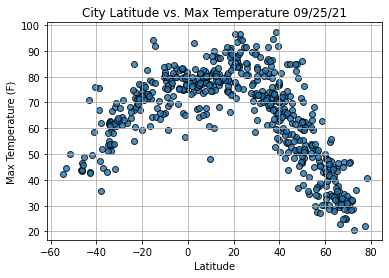

In [59]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

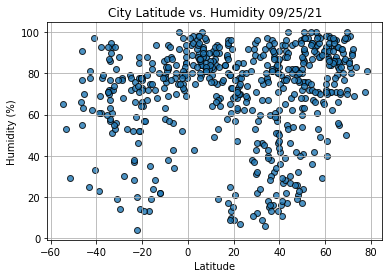

In [60]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

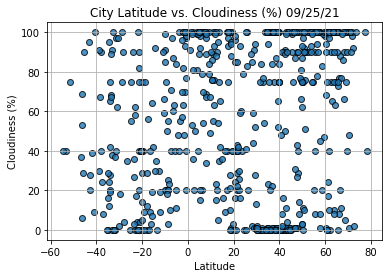

In [61]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

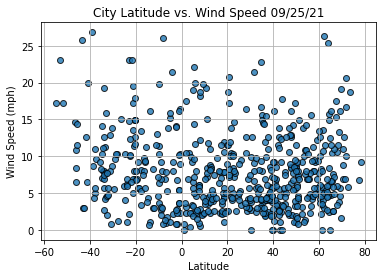

In [62]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [63]:
# Create a function to create perform linear regression on the weather data6.4.2
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

SyntaxError: unexpected EOF while parsing (3246110565.py, line 3)

In [64]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [65]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
3,Troitskoye,52.9821,84.6757,41.00,72,100,13.89,RU
4,Eastbourne,50.7687,0.2845,60.17,91,100,4.12,GB
8,Yabassi,4.4570,9.9682,74.84,98,100,2.26,CM
9,Naze,28.3667,129.4833,77.40,86,44,10.42,JP
13,Oranjestad,12.5240,-70.0270,87.75,75,20,11.01,AW
...,...,...,...,...,...,...,...,...
571,Mandan,46.8267,-100.8896,85.03,26,1,13.80,US
572,Srednekolymsk,67.4500,153.6833,32.95,92,99,15.37,RU
574,Ust-Kulom,61.6864,53.6902,46.22,86,100,10.78,RU
575,Koslan,63.4564,48.8989,44.13,97,100,6.91,RU


In [66]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
3,Troitskoye,52.9821,84.6757,41.00,72,100,13.89,RU
4,Eastbourne,50.7687,0.2845,60.17,91,100,4.12,GB
8,Yabassi,4.4570,9.9682,74.84,98,100,2.26,CM
9,Naze,28.3667,129.4833,77.40,86,44,10.42,JP
13,Oranjestad,12.5240,-70.0270,87.75,75,20,11.01,AW


In [67]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

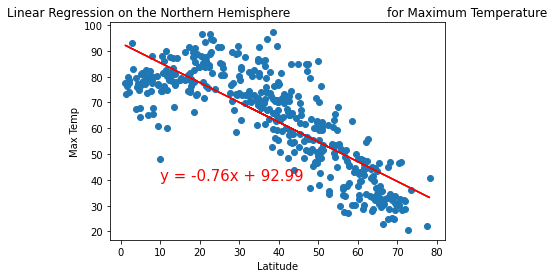

In [68]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

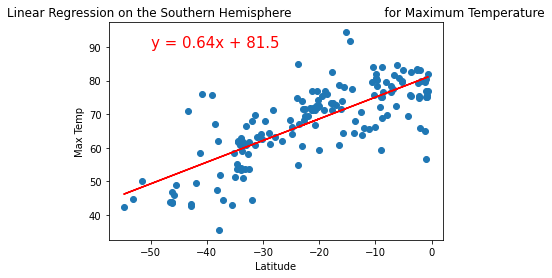

In [69]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                       for Maximum Temperature', 'Max Temp',(-50,90))

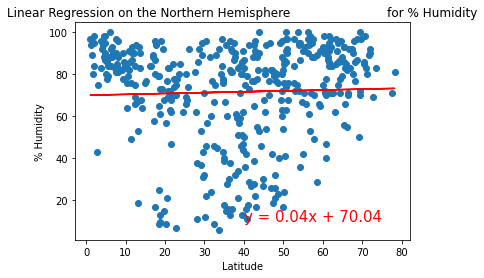

In [70]:
# Linear regression on the Northern Hemisphere6.4.3
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

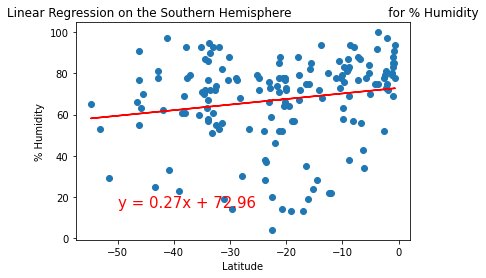

In [71]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))


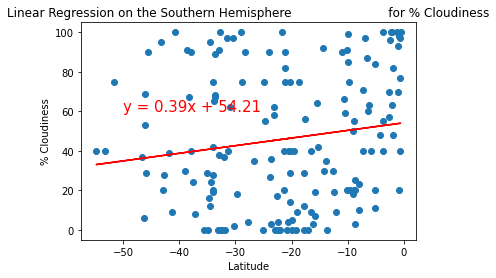

In [72]:
# Linear regression on the Southern Hemisphere6.4.4
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

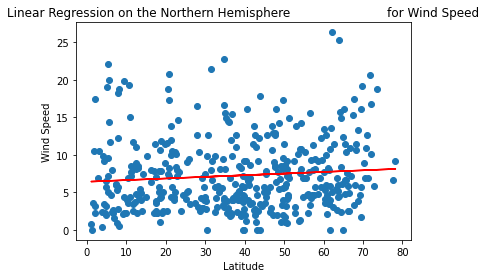

In [73]:
# Linear regression on the Northern Hemisphere6.4.5
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

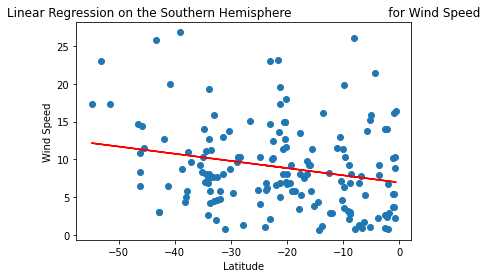

In [74]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))